In [3]:
# import pandas library
import pandas as pd

In [4]:
# Load Dataset
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
# Show first 5 rows
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Drop customer_id column (not useful for prediction
df = df.drop(columns=['customer_id'])

In [9]:
# Rename columns for easier use
df = df.rename(columns={
    'products_number': 'num_products',
    'credit_card': 'has_credit_card',
    'active_member': 'is_active'
})

In [10]:
# Check the fisrt 5 rows again
print(df.head())

   credit_score country  gender  age  tenure    balance  num_products  \
0           619  France  Female   42       2       0.00             1   
1           608   Spain  Female   41       1   83807.86             1   
2           502  France  Female   42       8  159660.80             3   
3           699  France  Female   39       1       0.00             2   
4           850   Spain  Female   43       2  125510.82             1   

   has_credit_card  is_active  estimated_salary  churn  
0                1          1         101348.88      1  
1                0          1         112542.58      0  
2                1          0         113931.57      1  
3                0          0          93826.63      0  
4                1          1          79084.10      0  


In [11]:
# Check missing values
print(df.isnull().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
num_products        0
has_credit_card     0
is_active           0
estimated_salary    0
churn               0
dtype: int64


In [12]:
# Check for duplicates
print("Number of dulicate rows:", df.duplicated().sum())

Number of dulicate rows: 0


In [13]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_products      10000 non-null  int64  
 7   has_credit_card   10000 non-null  int64  
 8   is_active         10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None
       credit_score           age        tenure        balance  num_products  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean     650.528800     38.921800      5.012800   76

In [14]:
df.head(21)

,credit_score,country,gender,age,tenure,balance,num_products,has_credit_card,is_active,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [16]:
# Encode gender (Male=1, Female=0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [18]:
df.head()

,credit_score,gender,age,tenure,balance,num_products,has_credit_card,is_active,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Separate features (x) and target (y)
x = df.drop('churn', axis=1) #all features
y = df['churn'] #target

In [20]:
# Scale numeric columns
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 
                'num_products', 'has_credit_card', 'is_active', 'estimated_salary']

scaler = StandardScaler()

# Fit and Transform only numeric columns
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])

In [21]:
print(x.head())

   credit_score  gender       age    tenure   balance  num_products  \
0     -0.326221       0  0.293517 -1.041760 -1.225848     -0.911583   
1     -0.440036       0  0.198164 -1.387538  0.117350     -0.911583   
2     -1.536794       0  0.293517  1.032908  1.333053      2.527057   
3      0.501521       0  0.007457 -1.387538 -1.225848      0.807737   
4      2.063884       0  0.388871 -1.041760  0.785728     -0.911583   

   has_credit_card  is_active  estimated_salary  country_Germany  \
0         0.646092   0.970243          0.021886            False   
1        -1.547768   0.970243          0.216534            False   
2         0.646092  -1.030670          0.240687            False   
3        -1.547768  -1.030670         -0.108918            False   
4         0.646092   0.970243         -0.365276            False   

   country_Spain  
0          False  
1           True  
2          False  
3          False  
4           True  


# Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify=y
)

# Check the shapes of the splits
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8000, 11)
x_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\n Classification Report:\n", classification_report(y_test, y_pred))

print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.808

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


 Confusion Matrix:
 [[1540   53]
 [ 331   76]]


# Logistic Regression model gave:
# Accuracy:81%
# Good performance on predicting customers who stay (class 0), Weak performance on predicting churners (class 1)

# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion= "gini")

# Train the model
dt_model.fit(x_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(x_test)

# Evaluation
print("=== Decision Tree (Baseline) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


=== Decision Tree (Baseline) ===
Accuracy: 0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.79      0.40      0.53       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:
 [[1549   44]
 [ 244  163]]


# Class-Imbalance-Aware Tree

In [26]:
# To pay more attention to the minority class (churn=1)
dt_balanced = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    criterion="gini",
    class_weight="balanced"
)

dt_balanced.fit(x_train, y_train)
y_pred_dt_bal = dt_balanced.predict(x_test)

In [27]:
print("\n=== Decision Tree (Class-Weighted) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_bal))


=== Decision Tree (Class-Weighted) ===
Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000


Confusion Matrix:
 [[1229  364]
 [  96  311]]


# Class-Weighted Decision Tree Results
# Accuracy: 0.77 (77%), It dropped compared to the baseline (from 85.6% → 77%).

In [28]:
# Feature Importance
import pandas as pd
feat_imp = pd.Series(dt_balanced.feature_importances_, index=x_train.columns)\
            .sort_values(ascending=False)

print("\n=== Top Feature Importances (Balanced Tree) ===")
print(feat_imp.head(15))


=== Top Feature Importances (Balanced Tree) ===
age                 0.469310
num_products        0.346078
is_active           0.071779
balance             0.065470
country_Germany     0.037601
estimated_salary    0.004407
gender              0.003663
credit_score        0.001548
tenure              0.000145
has_credit_card     0.000000
country_Spain       0.000000
dtype: float64


# Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest (you can start with 100 trees)
rf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    class_weight="balanced", # handle imbalance
    random_state=42
)
rf.fit(x_train, y_train)

# Predictions
y_pred_rf = rf.predict(x_test)

In [34]:
# Evaluation
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.8615

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Confusion Matrix:
 [[1545   48]
 [ 229  178]]


In [35]:
# Feature Importances
import pandas as pd
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
print("\n=== Top Feature Importances (Random Forest) ===")
print(feat_importances.sort_values(ascending=False))


=== Top Feature Importances (Random Forest) ===
age                 0.253378
balance             0.143881
estimated_salary    0.137890
credit_score        0.134835
num_products        0.128097
tenure              0.079982
is_active           0.035980
country_Germany     0.033552
gender              0.020161
has_credit_card     0.017630
country_Spain       0.014613
dtype: float64


# Tune Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [38]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1')  # To balance precision & recall

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate on test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_best = best_rf.predict(x_test)

print("\n=== Tuned Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

=== Tuned Random Forest ===
Accuracy: 0.839

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1593
           1       0.59      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000


Confusion Matrix:
 [[1406  187]
 [ 135  272]]


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: churn
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: churn
1    6370
0    6370
Name: count, dtype: int64


In [40]:
# Train Random Forest with tuned parameters
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf_smote.fit(x_train_res, y_train_res)

# Predict
y_pred_smote = rf_smote.predict(x_test)

# Evaluate
print("\n=== Random Forest with SMOTE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


=== Random Forest with SMOTE ===
Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.70      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000


Confusion Matrix:
 [[1355  238]
 [ 122  285]]


# SMOTE + Random Forest gave you the best churn recall so far.
# The model is more useful for customer retention strategies.

=== Model Comparison ===


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn)
0,Logistic Regression,0.810000,0.590000,0.190000,0.280000
1,Decision Tree,0.860000,0.790000,0.400000,0.530000
2,Random Forest (Tuned),0.840000,0.590000,0.670000,0.630000
3,Random Forest + SMOTE,0.820000,0.540000,0.700000,0.610000


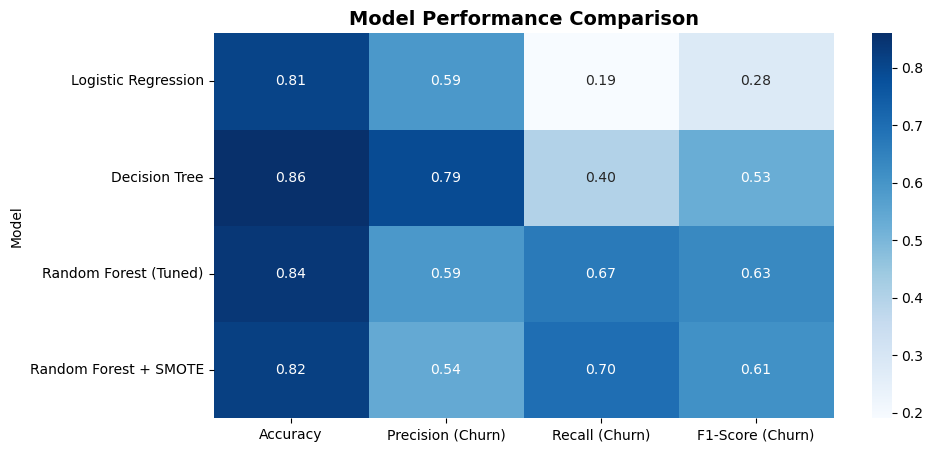

In [48]:
# import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate and return metrics
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Churn)": precision_score(y_test, y_pred),
        "Recall (Churn)": recall_score(y_test, y_pred),
        "F1-Score (Churn)": f1_score(y_test, y_pred)
    }

# Collect results into a list
results = []
results.append(evaluate_model("Logistic Regression", log_reg, x_test, y_test))
results.append(evaluate_model("Decision Tree", dt_model, x_test, y_test))
results.append(evaluate_model("Random Forest (Tuned)", best_rf, x_test, y_test))
results.append(evaluate_model("Random Forest + SMOTE", rf_smote, x_test, y_test))

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(2)  # round to 2 decimal places

# Highlight best performers per column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen; font-weight: bold' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=["Accuracy", "Precision (Churn)", "Recall (Churn)", "F1-Score (Churn)"])

print("=== Model Comparison ===")
display(styled_df)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.show()


# MODEL COMPARISON:

MODEL COMPARISON:


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn)
0,Logistic Regression,0.810000,0.590000,0.190000,0.280000
1,Decision Tree,0.860000,0.790000,0.400000,0.530000
2,Random Forest (Tuned),0.840000,0.590000,0.670000,0.630000
3,Random Forest + SMOTE,0.820000,0.540000,0.700000,0.610000


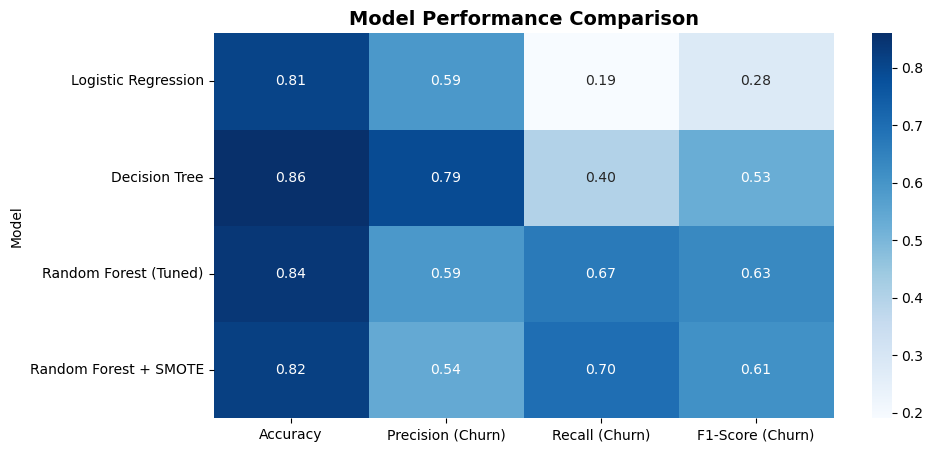


CONCLUSION:
Best Accuracy: Decision Tree
Best Precision (Churn): Decision Tree
Best Recall (Churn): Random Forest + SMOTE
Best F1-Score (Churn): Random Forest (Tuned)

RECOMMENDED MODEL: Random Forest (Tuned) (best balance of precision & recall)


In [53]:
# Model Comparison
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate and return metrics
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Churn)": precision_score(y_test, y_pred),
        "Recall (Churn)": recall_score(y_test, y_pred),
        "F1-Score (Churn)": f1_score(y_test, y_pred)
    }

# Collect results into a list
results = []
results.append(evaluate_model("Logistic Regression", log_reg, x_test, y_test))
results.append(evaluate_model("Decision Tree", dt_model, x_test, y_test))
results.append(evaluate_model("Random Forest (Tuned)", best_rf, x_test, y_test))
results.append(evaluate_model("Random Forest + SMOTE", rf_smote, x_test, y_test))

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(2)

# Highlight best performers per column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen; font-weight: bold' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=["Accuracy", "Precision (Churn)", "Recall (Churn)", "F1-Score (Churn)"])

print("MODEL COMPARISON:")
display(styled_df)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.show()

# Automated Conclusion
best_accuracy = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_precision = results_df.loc[results_df['Precision (Churn)'].idxmax(), 'Model']
best_recall = results_df.loc[results_df['Recall (Churn)'].idxmax(), 'Model']
best_f1 = results_df.loc[results_df['F1-Score (Churn)'].idxmax(), 'Model']

print("\nCONCLUSION:")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision (Churn): {best_precision}")
print(f"Best Recall (Churn): {best_recall}")
print(f"Best F1-Score (Churn): {best_f1}")

# Overall recommendation based on F1-Score (balances precision & recall)
overall_best = results_df.loc[results_df['F1-Score (Churn)'].idxmax(), 'Model']
print(f"\nRECOMMENDED MODEL: {overall_best} (best balance of precision & recall)")


# FEATURE IMPORTANCE ANALYSIS

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest (Tuned)
feature_importances = best_rf.feature_importances_

# define DataFrame
importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("Top Features Driving Churn:")
print(importance_df.head(10).round(3))


Top Features Driving Churn:
             Feature  Importance
2                age       0.324
5       num_products       0.204
4            balance       0.118
8   estimated_salary       0.082
0       credit_score       0.079
7          is_active       0.054
9    country_Germany       0.053
3             tenure       0.044
1             gender       0.023
10     country_Spain       0.010


# Visualization - Colorful Plot

C:\Users\levim\AppData\Local\Temp\ipykernel_8160\726359828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


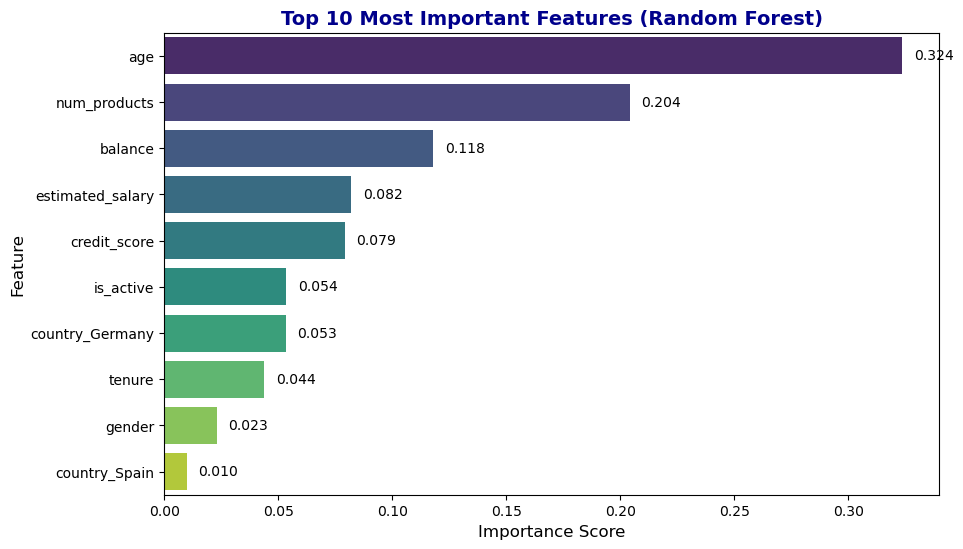

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=importance_df.head(10),
    x="Importance",
    y="Feature",
    palette="viridis"  # colorful palette
)

plt.title("Top 10 Most Important Features (Random Forest)", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Importance Score", fontsize=12, color="black")
plt.ylabel("Feature", fontsize=12, color="black")

# Add values on bars
for index, value in enumerate(importance_df.head(10)["Importance"]):
    plt.text(value + 0.005, index, f"{value:.3f}", va="center", color="black", fontsize=10)

plt.show()

# CORRELATION WITH CHURN

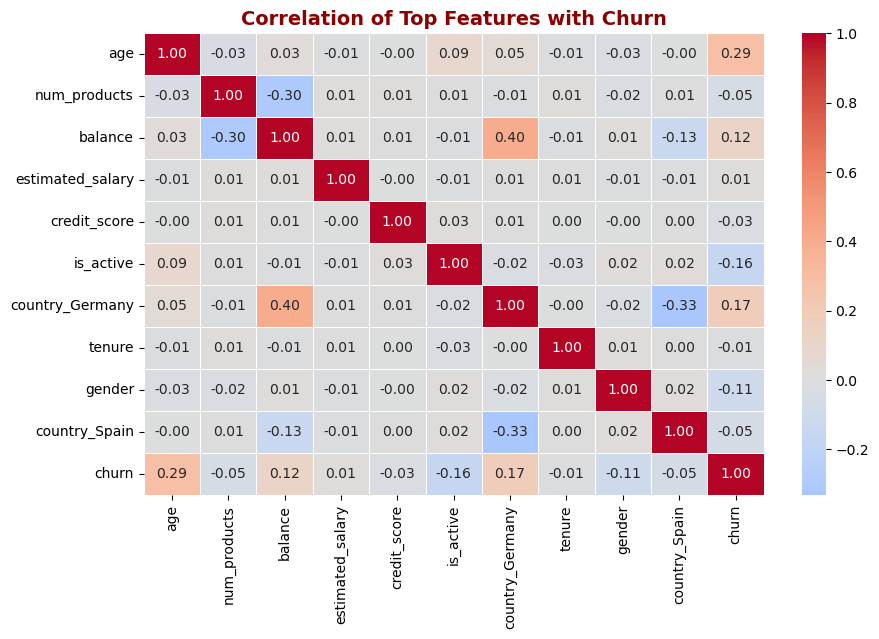

In [59]:
# Select top 10 features + churn column
top_features = importance_df.head(10)["Feature"].tolist()
corr_df = df[top_features + ["churn"]].corr()

# Heatmap Visualization
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation of Top Features with Churn", fontsize=14, fontweight="bold", color="darkred")
plt.show()